# 統計學習初論 (Spring, 2019)

Homework 2

截止日期: 9AM, 2019/3/19

請將HTML檔上傳至Ceiba作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

All About Regressions
Linear regression is one of the essential parametric models in statistical learning. We have discussed three types of regression models: ordinary least squares (OLS), ridge regression, and lasso regression. OLS can be learned as long as the training features are linearly independent. Ridge regression adopts L2 regularization for model learning, and Lasso adopts L1 regularization. Surprisingly, the prediction accuracy of the three types of models may be heavily influenced by how we preprocess the features and outcome values. We are going to explore these aspects in this homework.

When preparing the training and testing datasets, we can choose to apply different preprocessing procedures. For the outcome values (i.e.,  y ), we can choose to shift the mean (in training data) to zero by computing the mean of  y ,  y¯train , in the training data and subtract  y¯train  from all outcome values in the training and testing data. This will give us a zero mean for the outcome values of training data, and, in most cases, the mean of outcome values in testing data should be very close to zero. We will refer this procedure as "de-mean" in the subsequent discussion.

To sum up the two preprocessing procedures for outcome values  y , we can choose to (1) keep the original numerical value (referred to as "keep"), or (2) de-mean. If the de-meaned  y  is used in model training, then we need to add  y¯train  to the prediction. The reason is obvious: we need to shift the mean back to  y¯train .

We now turn our attention to the feature values. The feature can have continuous values or binary values. For continuous-valued features, we can standardize the feature values by subtracting the mean and then dividing the residuals with their standad deviation. This shifts the mean of the feature to zero and scales the feature to have a unit variance in the training data. You should apply the same procedure for testing data using the mean and standard deviation computed from training data.

If the feature is binary (i.e., x_binary in the table below), then we usually do not apply feature standardization. However, you may choose do standardize binary feature or simply do this by accident.

To explore the effects of these pre-processing procedures on prediction performance, we are going to compute the RMSE of the following 9 cases:

Each case use a different model and data preprocessing procedures. The "ymean" method in Case 1 simply uses the mean of  y  in the training data to do prediction. Cases 2A to 2C use OLS to train and predict. They are different in terms of how we preprocess feature values and outcome values. For example, Case 2C standardize all features (continuous-valued or binary) and use de-meaned y to train and predict outcome values. Cases 3A to 2D adopt Ridge regression and Case 4 adopts the Lasso regression. A constant term should be included in OLS, Ridge and Lasso regressions.

You are allowed to use learning models in sklearn.linear_model in this homework.

Dataset

We are going use a dataset that predict the outcome values using 44 features. This dataset was collected from a social media platform. The goal is to understand how a post on a company fan page reach the consumers. The first variable, life_post_consumer, is the number of people who clicked anywhere in the post. We want to construct a model that can predict this variable using the value of other variables.

The meaning of these variables are briefly described below.

Q1 (10%)

Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv("C://Users//POPO//Downloads//hw2_qonly//qonly//df1_train.csv")
test_x=pd.read_csv("C://Users//POPO//Downloads//hw2_qonly//qonly//df1_test1.csv")
test_y=pd.read_csv("C://Users//POPO//Downloads//hw2_qonly//qonly//df1_test1y.csv")
train.head(5)

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,...,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,...,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,...,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,...,0,0,0,1,0,0,0,0,0,0


In [2]:
train.shape

(400, 44)

In [3]:
train[["life_post_consumer","comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].describe()

,life_post_consumer,comp_page_like,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,share,like
count,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.00000
mean,810.340000,122890.625000,13436.855000,1.747735e+04,6585.952500,6.855000,25.485000,169.07250
std,899.037251,16280.121461,20454.614675,6.614514e+04,7599.228501,14.402519,25.946248,243.14837
min,17.000000,81370.000000,238.000000,5.670000e+02,236.000000,0.000000,0.000000,0.00000
25%,335.000000,112676.000000,3282.500000,3.962500e+03,2171.000000,1.000000,10.000000,55.75000
50%,554.500000,128816.000000,5150.000000,6.214500e+03,3391.000000,3.000000,18.500000,98.00000
75%,955.500000,136393.000000,13232.000000,1.510450e+04,8011.000000,7.000000,32.000000,187.25000
max,11328.000000,139441.000000,139008.000000,1.107833e+06,48368.000000,146.000000,208.000000,1998.00000


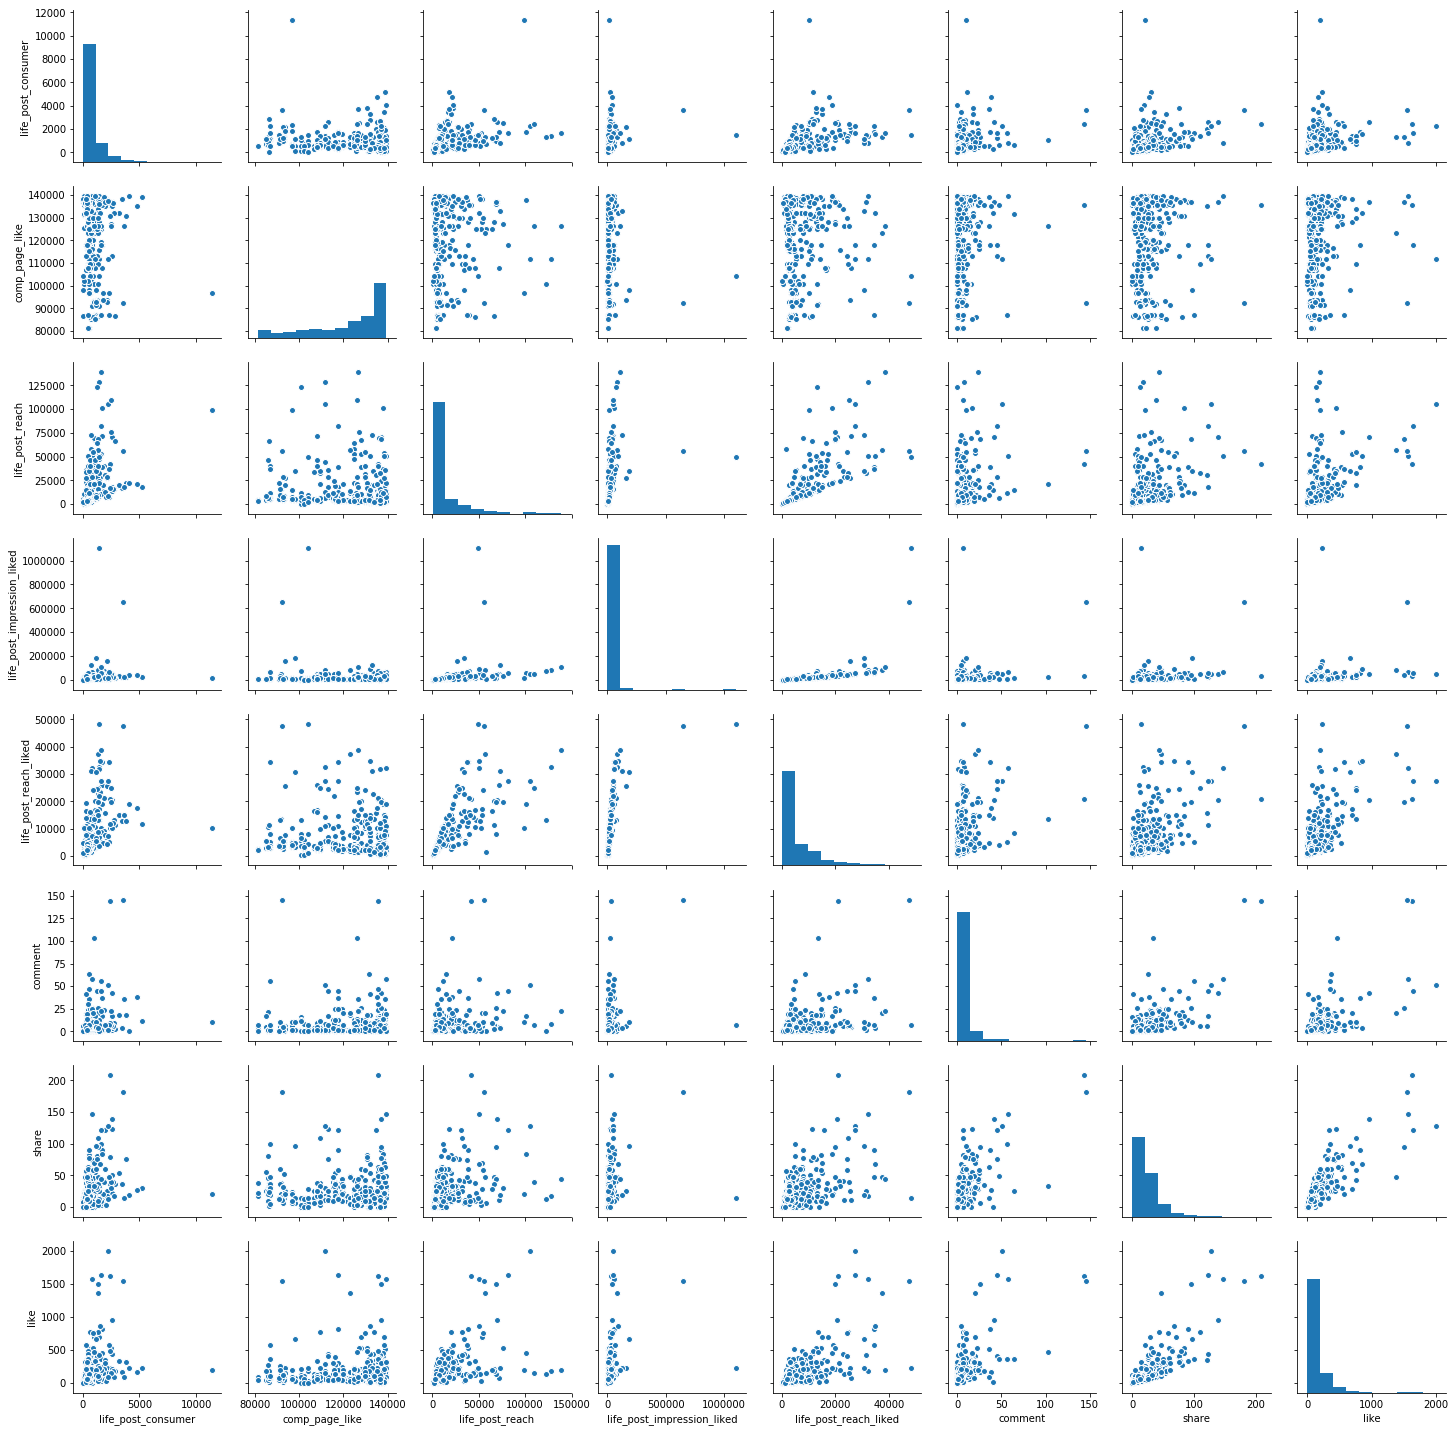

In [4]:
sns.pairplot(train, vars=["life_post_consumer","comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"])

In [5]:
train["Paid"].value_counts()

0    296
1    104
Name: Paid, dtype: int64

In [6]:
type_photo_sharing=train[((train["type_link"]==0) & (train["type_status"]==0) & (train["type_video"]==0))].shape[0]

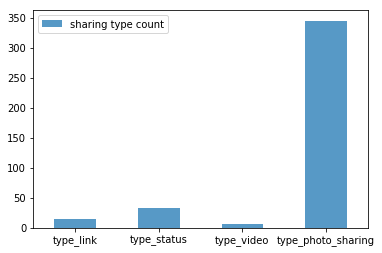

In [7]:
type=pd.DataFrame(train[["type_link","type_status","type_video"]].sum(),columns=["sharing type count"]).T
type["type_photo_sharing"]=type_photo_sharing
type.T.plot(kind='bar',alpha=0.75, rot=0)

In [8]:
action=train[((train["cat2"]==0) & (train["cat3"]==0) )].shape[0]

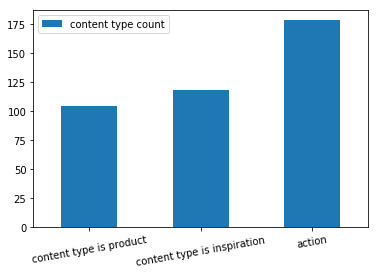

In [9]:
ans=pd.DataFrame(train[["cat2","cat3"]].sum(),columns=["content type count"])
ans.index=["content type is product","content type is inspiration"]
ans=ans.T
ans["action"]=action
ans.T.plot(kind="bar",rot=10)

In [10]:
a1=sum(list(train[train.columns[14:25]].sum()))
month12=train.shape[0]-a1

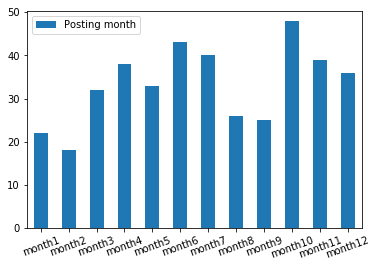

In [11]:
month=pd.DataFrame(train[train.columns[14:25]].sum(),columns=["Posting month"])
month=month.T
month["month12"]=month12
month.T.plot(kind="bar",rot=20)

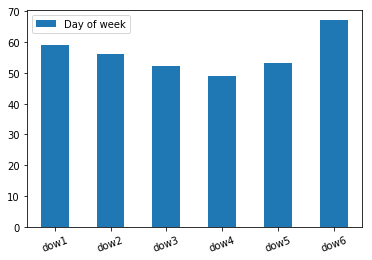

In [12]:
month=pd.DataFrame(train[train.columns[25:31]].sum(),columns=["Day of week"])
month.plot(kind="bar",rot=20)

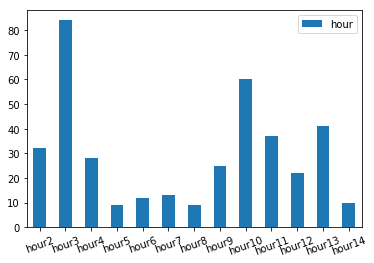

In [13]:
month=pd.DataFrame(train[train.columns[31:]].sum(),columns=["hour"])
month.plot(kind="bar",rot=20)

In [14]:
#連續變數的分布情況長的都不太像常態分佈而且或多或少都有Skew的現象
#有些自變數間有些許線性相關的情況(ex:share和like,life_post_reach和life_post_reach_liked......)
#photo sharing 是最常見的分享方式
#action (special offers and contests) 是最常見的內容形式
#每週的星期幾對於life_post_consumer似乎沒什麼影響(因為數量都差不多)
#hour 3 是 the number of people who clicked anywhere in the post 最常見的時候

Q2 (Case 1) (10%)

Construct a prediction model using the setting of Case 1. What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [15]:
mean=train["life_post_consumer"].mean()
ypred=[mean]*test_x.shape[0]
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(ypred,test_y))
rms

928.8095109332162

In [16]:
print(ypred[:20])

[810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34, 810.34]


In [17]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


Q3 (Case 2A) (10%)

Construct a prediction model using the setting of Case 2A. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [18]:
from sklearn.linear_model import LinearRegression
train_x=train.drop("life_post_consumer",axis=1)
train_y=train["life_post_consumer"]
slr = LinearRegression()
slr.fit(train_x, train_y)
ypred = slr.predict(test_x)
rms = sqrt(mean_squared_error(ypred,test_y))
rms

692.2891271362123

In [19]:
print(ypred[:20])

[ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071218 4288.223081  ]


In [20]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


Q4 (Case 2B) (10%)

Construct a prediction model using the setting of Case 2B. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [21]:
mean=train["life_post_consumer"].mean()
train_x=train.drop("life_post_consumer",axis=1)
train_y=train["life_post_consumer"]-mean
slr = LinearRegression()
slr.fit(train_x, train_y)
ypred = slr.predict(test_x)+mean
rms = sqrt(mean_squared_error(ypred,test_y))
rms

692.2891271362292

In [22]:
print(ypred[:20])

[ 781.57991507  315.92043112 2279.0848524  -136.34286373  302.35624062
  462.42402368  321.67770824  504.52244768  505.89547104  488.36700578
  392.61423519  388.9184671   804.87527509  634.32364432  176.31765618
  645.7291381  1983.53858871 3144.39710045 4060.61071217 4288.223081  ]


In [23]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


Q5 (Case 2C) (10%)

Construct a prediction model using the setting of Case 2C. What is the test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data?

In [24]:
import numpy as np
mean=train["life_post_consumer"].mean()
train_x=train.drop("life_post_consumer",axis=1)
train_y=train["life_post_consumer"]-mean

train_x=(train_x-train_x.mean())/train_x.std()
test_x_std=(test_x-train_x.mean())/train_x.std()

slr.fit(train_x, train_y)
ypred = slr.predict(test_x_std)+mean

rms = sqrt(mean_squared_error(ypred,test_y))
rms

132825720.9835818

In [25]:
print(ypred[:20])

[-1.19202983e+08 -1.51072504e+08 -1.38518889e+08 -1.53501804e+08
 -1.44885289e+08 -1.21519554e+08 -1.51900773e+08 -1.50270410e+08
 -1.27629091e+08 -1.17007670e+08 -1.48941189e+08 -1.39402139e+08
 -8.90644044e+07 -1.34520536e+08 -1.11087314e+08 -1.42132081e+08
 -1.51408843e+08 -1.40017843e+08 -4.50278624e+07 -4.63417529e+07]


In [26]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


Q6 (Case 3A) (10%)

Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

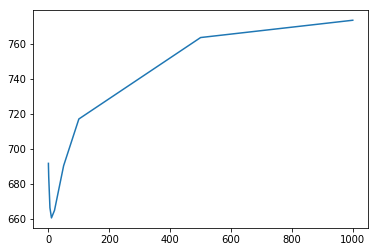

In [27]:
from sklearn.linear_model import Ridge
train_x=train.drop("life_post_consumer",axis=1)
train_y=train["life_post_consumer"]
case=[]
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = Ridge(alpha=k)
    clf.fit(train_x, train_y)
    ypred=clf.predict(test_x)
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case,label="Case 3A")

In [28]:
i=np.argmin(case)
print(case[i])
print(k[i])

660.5612900111674
10


In [29]:
clf = Ridge(alpha=k[i])
clf.fit(train_x, train_y)
ypred=clf.predict(test_x)
rms = sqrt(mean_squared_error(ypred,test_y))
rms

660.5612900111674

In [31]:
print(ypred[:20])

[1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]


In [30]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


Q7 (Case 3B) (10%)

Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

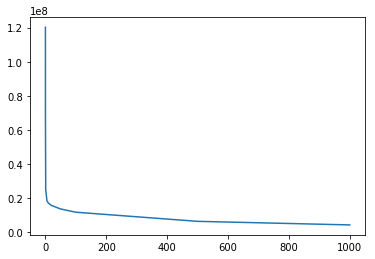

In [32]:
mean=train["life_post_consumer"].mean()
train_y=train["life_post_consumer"]-mean
train_x=train.drop("life_post_consumer",axis=1)
test_x_std=test_x
train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]-train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].mean()
train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]/train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].std()
test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]-train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].mean()
test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]/train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].std()


case=[]
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = Ridge(alpha=k)
    clf.fit(train_x, train_y)
    ypred=clf.predict(test_x_std)+mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case,label="Case 3B")

In [33]:
i=np.argmin(case)
print(case[i])
print(k[i])

4354737.486511544
1000


In [34]:
clf = Ridge(alpha=k[i])
clf.fit(train_x, train_y)
ypred=clf.predict(test_x_std)+mean
rms = sqrt(mean_squared_error(ypred,test_y))
rms

4354737.486511544

In [35]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


In [36]:
print(ypred[:20])

[ 1144127.97019469 -5028884.91773263 -2321294.89168498 -5026202.46813922
 -4450503.9346664  -3043985.41516281 -4482803.22243933 -4862008.1530982
 -3557456.98058663 -3168203.60720609 -4503487.18499417 -4225671.48012155
 -2502228.06335397 -3663149.2177595  -3378232.55121661 -3995661.79421221
 -3699636.36965232  -215358.36916398 14007948.50001018 10816417.88232826]


Q8 (Case 3C) (10%)¶

Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

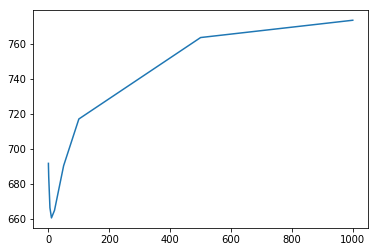

In [37]:
mean=train["life_post_consumer"].mean()
train_y=train["life_post_consumer"]-mean
train_x=train.drop("life_post_consumer",axis=1)
case=[]
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = Ridge(alpha=k)
    clf.fit(train_x, train_y)
    ypred=clf.predict(test_x)+mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case,label="Case 3C")

In [38]:
i=np.argmin(case)
print(case[i])
print(k[i])

660.5612900111668
10


In [39]:
clf = Ridge(alpha=k[i])
clf.fit(train_x, train_y)
ypred=clf.predict(test_x)+mean
rms = sqrt(mean_squared_error(ypred,test_y))
rms

660.5612900111668

In [40]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


In [41]:
print(ypred[:20])

[1068.33362385  229.7553192  2008.55889192 -102.8748995   541.45769947
  606.45925756  414.98279829  602.81051442  500.18438508  492.30663558
  508.37649961  409.13002153  730.46768043  561.0603282   294.45089723
  602.48286746 1632.18271503 2698.88281782 3841.63152846 3892.40090903]


Q9 (Case 3D) (10%)

Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

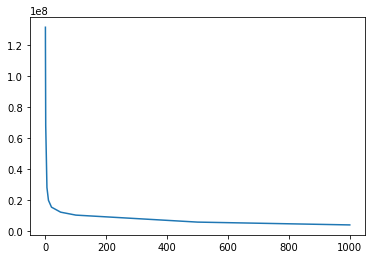

In [42]:
mean=train["life_post_consumer"].mean()
train_x=train.drop("life_post_consumer",axis=1)
train_y=train["life_post_consumer"]-mean
#apply std both on training and testing data
train_x=(train_x-train_x.mean())/train_x.std()
test_x_std=(test_x-train_x.mean())/train_x.std()

case=[]
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = Ridge(alpha=k)
    clf.fit(train_x, train_y)
    ypred=clf.predict(test_x_std)+mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case,label="Case 3D")

In [43]:
i=np.argmin(case)
print(case[i])
print(k[i])

4110911.9651916767
1000


In [44]:
clf = Ridge(alpha=k[i])
clf.fit(train_x, train_y)
ypred=clf.predict(test_x_std)+mean
rms = sqrt(mean_squared_error(ypred,test_y))
rms

4110911.9651916767

In [45]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


In [46]:
print(ypred[:20])

[ 1398304.87759221 -4571260.73553519 -1962402.84902748 -4564130.29735094
 -4020680.9961712  -2701171.54563227 -4032113.28819794 -4410058.24033813
 -3188210.57027277 -2832795.17561221 -4061768.23075941 -3814495.08407449
 -2241515.69118688 -3273958.42269589 -3049747.654117   -3584790.89460164
 -3271577.53278246   105484.60497014 14081089.72276613 11023768.55700619]


Q10 (Case 4) (10%)

Construct a prediction model using the setting of Case 4. You should consider at least the following values for the regularization coefficient ( α ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α . What is the best test RMSE? What is the predictions and the true outcome values for the first 20 data points in the testing data using the best  α ?

C:\Users\POPO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\POPO\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


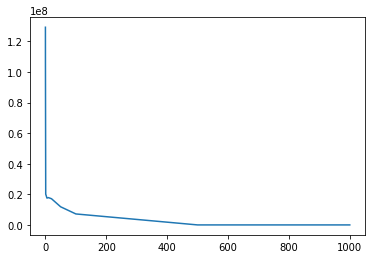

In [47]:
mean=train["life_post_consumer"].mean()
train_x=train.drop("life_post_consumer",axis=1)
train_y=train["life_post_consumer"]-mean



test_x_std=test_x

#apply std both on training and testing data(連續變數的部分)
train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]-train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].mean()
train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]/train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].std()
test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]-train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].mean()
test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]=test_x_std[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]]/train_x[["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","share","like"]].std()



from sklearn import linear_model
case=[]
for k in [ 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]:
    clf = linear_model.Lasso(alpha=k)
    clf.fit(train_x, train_y)
    ypred=clf.predict(test_x_std)+mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)
k=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(k,case,label="Case 4")

In [48]:
i=np.argmin(case)
print(case[i])
print(k[i])

928.8095109332162
500


In [49]:
clf = linear_model.Lasso(alpha=k[i])
clf.fit(train_x, train_y)
ypred=clf.predict(test_x_std)+mean
rms = sqrt(mean_squared_error(ypred,test_y))
rms

928.8095109332162

In [50]:
print(test_y[:20])

    life_post_consumer
0                 1183
1                  189
2                 2327
3                   76
4                  354
5                  713
6                  204
7                  288
8                  555
9                  586
10                 446
11                 884
12                 524
13                 672
14                  23
15                 570
16                1361
17                5934
18                2319
19                1633


In [51]:
print(ypred[:20])

[810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34
 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34 810.34]


Q11 (10%)

Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?